In [12]:
import matplotlib.pyplot as plt
import numpy as np

---

In [13]:
# McCormick function
def f(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

# Partial derivative with respect to x
def dx_dz(x, y):
    return np.cos(x + y) + 2*(x - y) - 1.5

# Partial derivative with respect to y
def dy_dz(y, x):
    return np.cos(x + y) - 2*(x - y) + 2.5

In [14]:
def gradient_descent(x, y, learning_rate, max_iter):
    """
    Performs gradient descent optimization to find the minimum of a function.

    Args:
        x (float): The initial x-coordinate.
        y (float): The initial y-coordinate.
        learning_rate (float): The learning rate for the optimization.
        max_iter (int): The max number of iterations to perform.

    Returns:
        tuple: A tuple containing the x-coordinates, y-coordinates, function values, and the number of iterations taken.

    """
    z = f(x, y)

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0

    for _ in range(max_iter):
        xo, yo = x, y
        x -= learning_rate * dx_dz(xo, yo)
        y -= learning_rate * dy_dz(yo, xo)

        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1

        # convergence criterion
        if abs(x + 0.547) < 1e-4:
            break

    return x_journey, y_journey, z_journey, iter_step

In [15]:
beta2 = 0.99  # dont change
beta1 = 0.9  # dont change

In [16]:
# ADAM
def adam(x, y, learning_rate, max_iter):
    """
    Performs the ADAM optimization algorithm to minimize the function f(x, y).

    Parameters:
    - x (float): The initial x-coordinate.
    - y (float): The initial y-coordinate.
    - learning_rate (float): The learning rate for the optimization.
    - max_iter (int): The max number of iterations to perform.

    Returns:
    - x_journey (list): The list of x-coordinates at each iteration.
    - y_journey (list): The list of y-coordinates at each iteration.
    - z_journey (list): The list of function values at each iteration.
    - iter_step (int): The number of iterations performed until convergence.

    """
    z = f(x, y)

    # intialize momentum vector
    v_x = 0
    v_y = 0

    m_x = 0
    m_y = 0

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0
    for i in range(max_iter):
        xo, yo = x, y

        # gradient
        dx = dx_dz(xo, yo)
        dy = dy_dz(yo, xo)

        # caculate momentum vector m
        m_x = beta1 * m_x + (1 - beta1) * dx
        m_y = beta1 * m_y + (1 - beta1) * dy

        # remove biasm
        mt_x = m_x / (1 - beta1**(i+1))
        mt_y = m_y / (1 - beta1**(i+1))

        # caculate momentum vector v
        v_x = beta2 * v_x + (1 - beta2) * dx**2
        v_y = beta2 * v_y + (1 - beta2) * dy**2

        #remove bias
        vt_x = v_x / (1 - beta2**(i+1))
        vt_y = v_y / (1 - beta2**(i+1))

        # update values
        x -= learning_rate * mt_x / (np.sqrt(vt_x) + 1e-5)
        y -= learning_rate * mt_y / (np.sqrt(vt_y) + 1e-5)

        # add values
        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1

        # conergence criterium
        if abs(x+0.547)<1e-4:
            break
    return x_journey, y_journey, z_journey, iter_step

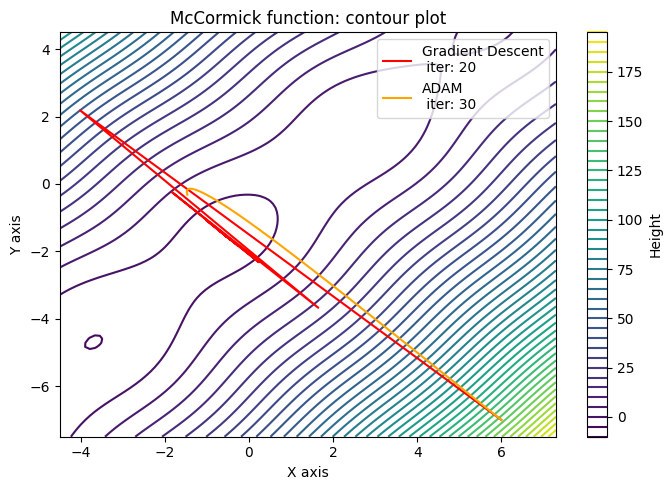

In [18]:
# Countourplot
fig, ax = plt.subplots(figsize=(7, 5))

# intialize x,y,z
x = np.linspace(-4.5, 7.3, 100)
y = np.linspace(-7.5, 4.5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Second subplot for 2D contour plot
contour = ax.contour(x, y, z, levels=40, cmap='viridis')
ax.set_title('McCormick function: contour plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.colorbar(contour, ax=ax, orientation='vertical', label='Height')

# starting point
xs = 6
ys = -7

# parameters
max_iter = 30
lr = 0.4 # learning rate

# Gradient Descent
x_gd, y_gd, z_gd, iter_steps_gd = gradient_descent(xs, ys, lr, max_iter)
ax.plot(x_gd, y_gd, color='r', label='Gradient Descent\n iter: {}'.format(iter_steps_gd))

# ADAM
x_adam, y_adam, z_adam,iter_adam = adam(xs, ys, lr, max_iter)
ax.plot(x_adam, y_adam, color='orange', label='ADAM\n iter: {}'.format(iter_adam))

plt.legend()
plt.tight_layout()
plt.show()